EDA base on https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


[0.06902012 0.05530073 0.11716573 0.06167673 0.06108808 0.02158006
 0.03736615 0.08072135 0.11081351 0.08746712 0.07009738 0.11449723
 0.1132058 ]


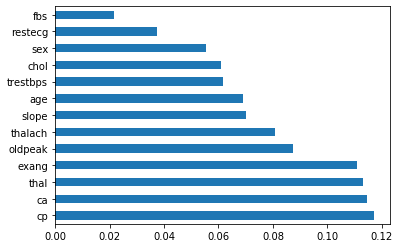

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

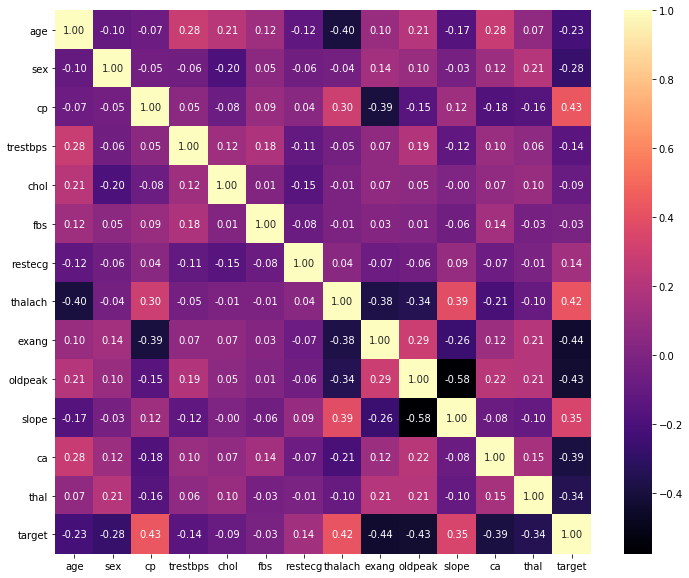

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [15]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

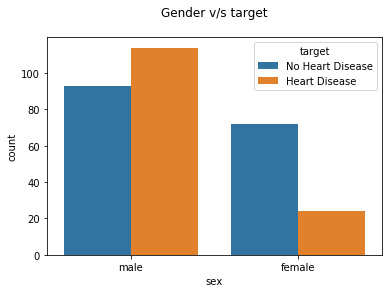

In [16]:
# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

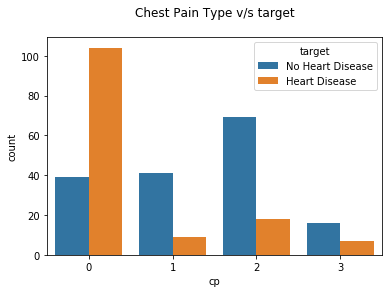

In [17]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


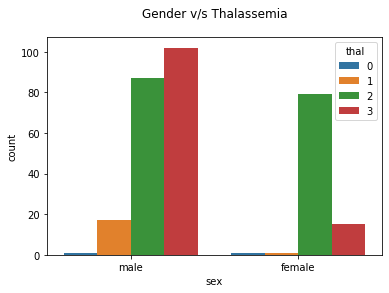

In [18]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

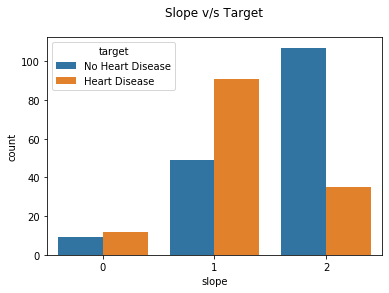

In [19]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

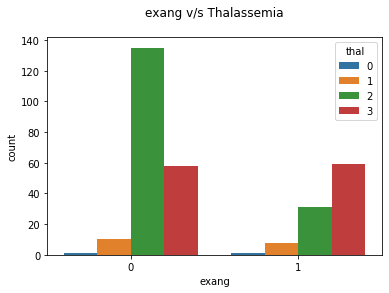

In [20]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

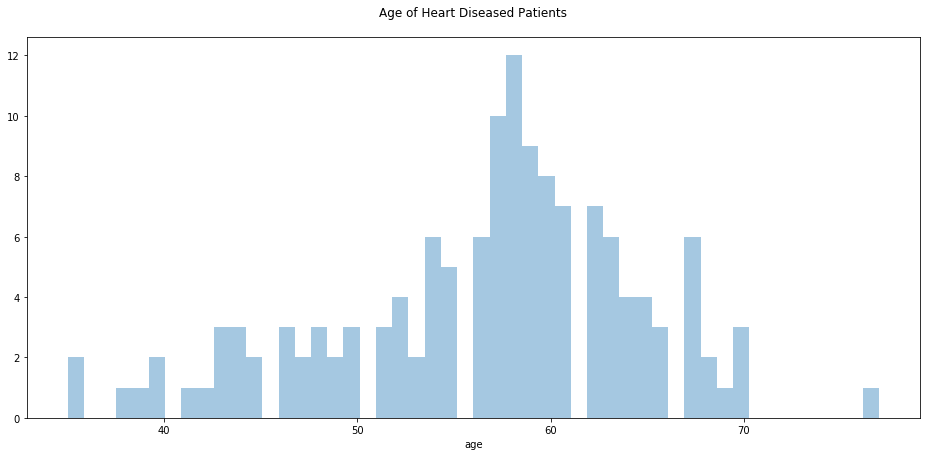

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

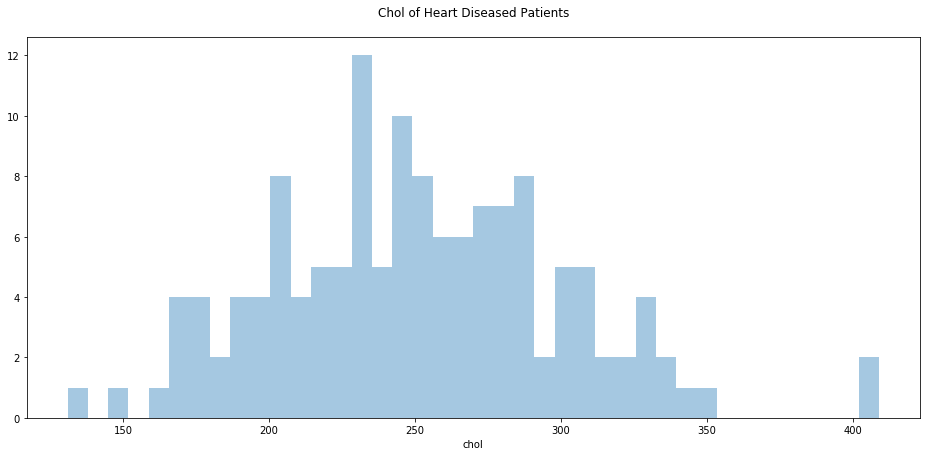

In [22]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

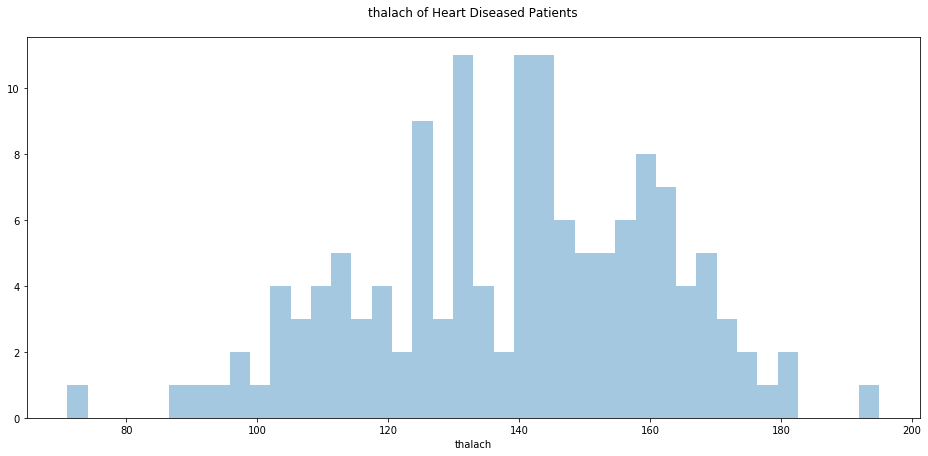

In [23]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

Age vs trestbps(Heart Diseased Patinets)


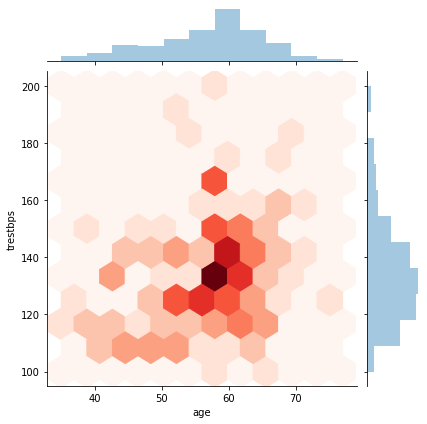

In [24]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
#target 0 - people with heart disease
pal = sns.light_palette("blue", as_cmap=True)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

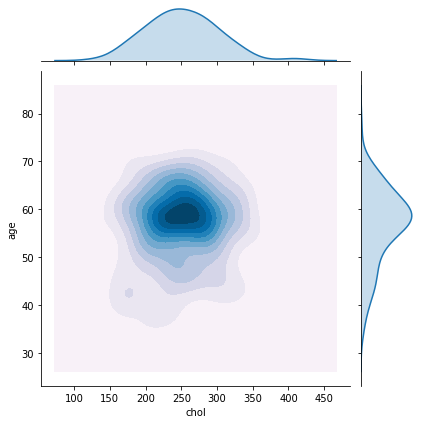

In [25]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

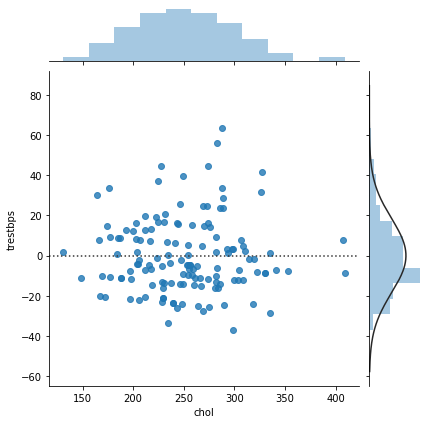

In [26]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

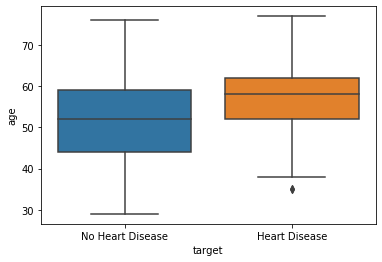

In [27]:
sns.boxplot(data=df2,x='target',y='age')

In [28]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143
